# Algoritmos de Clasificación Supervisada

**Índice:**
1. Importación de librerías y configuración
2. Regresión logística
3. K-Nearest Neighbors (K-NN)
4. Árboles de decisión
5. Random Forest
6. Support Vector Machines (SVM)
7. Comparación de algoritmos


In [1]:
# Importación de librerías y configuración
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


## 2. Regresión Logística

La regresión logística es un algoritmo de clasificación que modela la probabilidad de que una instancia pertenezca a una clase. Es especialmente útil para problemas de clasificación binaria.

**Ventajas:**
- Fácil de interpretar
- Rápido de entrenar
- Funciona bien con variables linealmente separables

**Desventajas:**
- No captura relaciones no lineales complejas


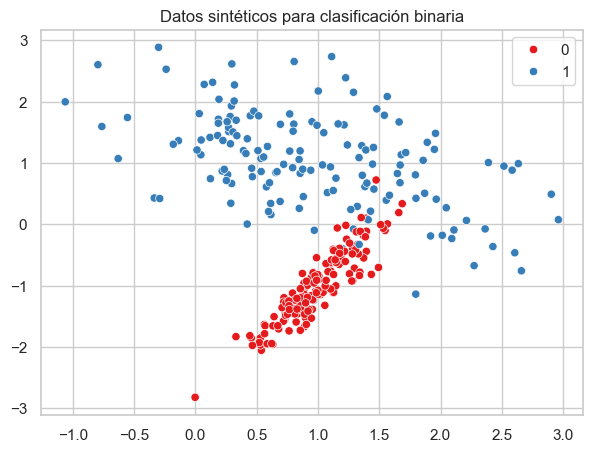

Exactitud: 0.9555555555555556
Matriz de confusión:
[[44  2]
 [ 2 42]]


In [2]:
# Ejemplo de Regresión Logística
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generar datos sintéticos
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Visualización de los datos
plt.figure(figsize=(7,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1')
plt.title('Datos sintéticos para clasificación binaria')
plt.show()

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = logreg.predict(X_test_scaled)
print('Exactitud:', accuracy_score(y_test, y_pred))
print('Matriz de confusión:')
print(confusion_matrix(y_test, y_pred))


## 3. K-Nearest Neighbors (K-NN)

K-NN es un algoritmo de clasificación basado en la proximidad de los datos. Clasifica una instancia según la mayoría de sus vecinos más cercanos.

**Ventajas:**
- Simple de entender e implementar
- No requiere entrenamiento explícito

**Desventajas:**
- Costoso computacionalmente para grandes volúmenes de datos
- Sensible a la escala de las variables y al valor de k


In [3]:
# Ejemplo de K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento y predicción con K-NN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print('Exactitud K-NN:', accuracy_score(y_test, y_pred_knn))
print('Matriz de confusión K-NN:')
print(confusion_matrix(y_test, y_pred_knn))


Exactitud K-NN: 0.9555555555555556
Matriz de confusión K-NN:
[[45  1]
 [ 3 41]]


## 4. Árboles de Decisión

Los árboles de decisión son modelos que dividen los datos en ramas según reglas de decisión, hasta llegar a una predicción final.

**Ventajas:**
- Fácil de interpretar y visualizar
- Captura relaciones no lineales

**Desventajas:**
- Puede sobreajustar fácilmente
- Sensible a pequeñas variaciones en los datos


In [4]:
# Ejemplo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento y predicción con Árbol de Decisión
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print('Exactitud Árbol de Decisión:', accuracy_score(y_test, y_pred_dt))
print('Matriz de confusión Árbol de Decisión:')
print(confusion_matrix(y_test, y_pred_dt))


Exactitud Árbol de Decisión: 0.9333333333333333
Matriz de confusión Árbol de Decisión:
[[44  2]
 [ 4 40]]


## 5. Random Forest

Random Forest es un conjunto de árboles de decisión entrenados sobre diferentes subconjuntos de los datos. La predicción se realiza por votación entre los árboles.

**Ventajas:**
- Reduce el sobreajuste
- Generaliza mejor que un solo árbol

**Desventajas:**
- Menos interpretable que un solo árbol
- Más costoso computacionalmente


In [5]:
# Ejemplo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento y predicción con Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print('Exactitud Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Matriz de confusión Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))


Exactitud Random Forest: 0.9555555555555556
Matriz de confusión Random Forest:
[[45  1]
 [ 3 41]]


## 6. Support Vector Machines (SVM)

SVM es un algoritmo que busca el hiperplano que mejor separa las clases en el espacio de características. Puede usar funciones kernel para separar datos no lineales.

**Ventajas:**
- Eficaz en espacios de alta dimensión
- Flexible con diferentes kernels

**Desventajas:**
- Costoso para grandes volúmenes de datos
- Difícil de interpretar


In [6]:
# Ejemplo de Support Vector Machines
from sklearn.svm import SVC

# Entrenamiento y predicción con SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print('Exactitud SVM:', accuracy_score(y_test, y_pred_svm))
print('Matriz de confusión SVM:')
print(confusion_matrix(y_test, y_pred_svm))


Exactitud SVM: 0.9555555555555556
Matriz de confusión SVM:
[[45  1]
 [ 3 41]]


## 7. Comparación de Algoritmos

A continuación se comparan los algoritmos anteriores en términos de exactitud sobre el mismo conjunto de datos sintéticos. Esto permite observar sus diferencias de desempeño en un problema de clasificación binaria sencillo.


C:\Users\adria\AppData\Local\Temp\ipykernel_52632\3389436398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algoritmo', y='Exactitud', data=resultados, palette='Set2')


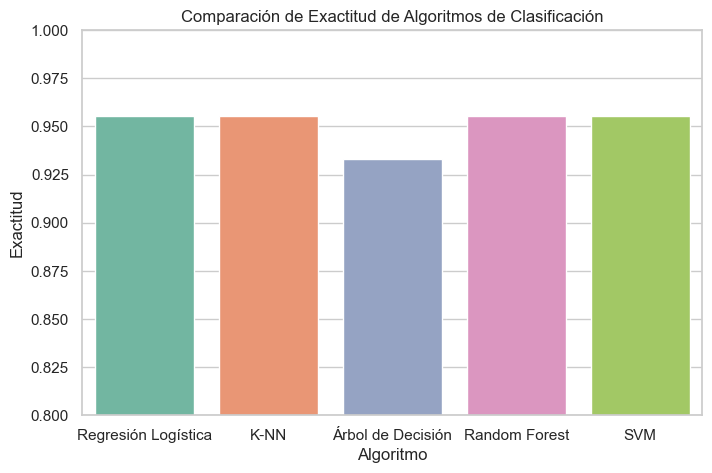

,Algoritmo,Exactitud
0,Regresión Logística,0.955556
1,K-NN,0.955556
2,Árbol de Decisión,0.933333
3,Random Forest,0.955556
4,SVM,0.955556


In [7]:
# Comparación de exactitud de los algoritmos
resultados = pd.DataFrame({
    'Algoritmo': ['Regresión Logística', 'K-NN', 'Árbol de Decisión', 'Random Forest', 'SVM'],
    'Exactitud': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
})

sns.barplot(x='Algoritmo', y='Exactitud', data=resultados, palette='Set2')
plt.title('Comparación de Exactitud de Algoritmos de Clasificación')
plt.ylim(0.8, 1.0)
plt.show()

resultados